In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
url = 'https://raw.githubusercontent.com/jamestgodwin/synthetic_data/main/data/back_pain.csv'
back_pain = pd.read_csv(url)
back_pain.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
back_pain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [6]:
back_pain.drop('Unnamed: 13', axis=1, inplace=True)
back_pain.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope',
               'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'direct_tilt',
               'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'soliosis_slope', 'state']

In [7]:
# Check for missing data
back_pain.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
soliosis_slope              0
state                       0
dtype: int64

In [8]:
# Change 'state' column to binary
mapping = {'Abnormal': 0, 'Normal': 1}
back_pain['state'] = back_pain['state'].map(mapping)

In [9]:
back_pain.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,soliosis_slope,state
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [10]:
# Split data in X and y
X = back_pain.drop(['state'], axis=1)
y = back_pain['state']

In [11]:
def get_principal_component_model(data, n_components=0):
    """
    Principal component analysis
    
    Inputs
    ------
    data: raw data (DataFrame)
    
    Returns
    -------
    A dictionary of:
        model: pca model object
        transformed_X: transformed_data
        explained_variance: explained_variance
    """
    
    # If n_components not passed to function, use number of features in data
    if n_components == 0:
        n_components = data.shape[1]
    
    pca = PCA(n_components)
    transformed_X = pca.fit_transform(data)

    #fit_transform reduces X to the new datasize if n components is specified
    explained_variance = pca.explained_variance_ratio_
    
    # Compile a dictionary to return results
    results = {'model': pca,
               'transformed_X': transformed_X,
               'explained_variance': explained_variance}
    
    return results

In [12]:
def make_synthetic_data_pc(X_original, y_original, number_of_samples=1000, 
                           n_components=0):
    """
    Synthetic data generation.
    Calls on `get_principal_component_model` for PCA model
    If number of components not defined then the function sets it to the number
      of features in X
    
    Inputs
    ------
    original_data: X, y numpy arrays
    number_of_samples: number of synthetic samples to generate
    n_components: number of principal components to use for data synthesis
    
    Returns
    -------
    X_synthetic: NumPy array
    y_synthetic: NumPy array

    """
    
    # If number of PCA not passed, set to number of features in X
    if n_components == 0:
        n_components = X_original.shape[1]
    
    # Split the training data into positive and negative
    mask = y_original == 1
    X_train_pos = X_original[mask]
    mask = y_original == 0
    X_train_neg = X_original[mask]
    
    # Pass negative and positive label X data sets to Principal Component Analysis 
    pca_pos = get_principal_component_model(X_train_pos, n_components)
    pca_neg = get_principal_component_model(X_train_neg, n_components)
    
    # Set up list to hold negative and positive label transformed data
    transformed_X = []
    
    # Create synthetic data for positive and negative PCA models 
    for pca_model in [pca_pos, pca_neg]:
        
        # Get PCA tranformed data
        transformed = pca_model['transformed_X']
        
        # Get means and standard deviations, to use for sampling
        means = transformed.mean(axis=0)
        stds = transformed.std(axis=0)
    
        # Make synthetic PC data using sampling from normal distributions
        synthetic_pca_data = np.zeros((number_of_samples, n_components))
        for pc in range(n_components):
            synthetic_pca_data[:, pc] = \
                np.random.normal(means[pc], stds[pc], size=number_of_samples)
        transformed_X.append(synthetic_pca_data)
        
    # Reverse transform data to create synthetic data to be used
    X_synthetic_pos = pca_pos['model'].inverse_transform(transformed_X[0])
    X_synthetic_neg = pca_neg['model'].inverse_transform(transformed_X[1])
    y_synthetic_pos = np.ones((X_synthetic_pos.shape[0],1))
    y_synthetic_neg = np.zeros((X_synthetic_neg.shape[0],1))
    
    # Combine positive and negative and shuffle rows
    X_synthetic = np.concatenate((X_synthetic_pos, X_synthetic_neg), axis=0)
    y_synthetic = np.concatenate((y_synthetic_pos, y_synthetic_neg), axis=0)
    
    # Randomise order of X, y
    synthetic = np.concatenate((X_synthetic, y_synthetic), axis=1)
    shuffle_index = np.random.permutation(np.arange(X_synthetic.shape[0]))
    synthetic = synthetic[shuffle_index]
    X_synthetic = synthetic[:,0:-1]
    y_synthetic = synthetic[:,-1]
                                                                   
    return X_synthetic, y_synthetic

In [13]:
# Create synthetic data
pca_X, pca_y = make_synthetic_data_pc(X, y, number_of_samples=155)

In [14]:
# Build synthetic dataset
pca_df = pd.DataFrame(np.hstack([pca_X, pca_y.reshape(-1,1)]), 
                      columns=back_pain.columns)

In [15]:
pca_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,soliosis_slope,state
0,66.424241,13.145377,45.185991,53.278864,73.327132,-19.627681,0.479247,32.442893,4.155575,8.097460,-9.144797,30.099895,0.0
1,54.175235,23.023076,37.043805,31.152159,112.673648,10.991294,0.594502,12.522723,13.882245,17.493201,-2.515229,33.123557,1.0
2,53.490429,7.931850,50.772190,45.558579,126.420084,3.628837,0.385226,29.301013,16.040663,13.380994,-3.019949,10.471509,1.0
3,111.171811,37.914919,87.767290,73.256891,101.841959,38.081865,0.643334,20.792135,13.060959,9.066315,-9.561377,15.728742,0.0
4,70.852150,25.019158,71.510276,45.832992,104.851430,17.138912,0.588839,15.279058,10.292621,10.136570,1.045483,15.173598,0.0


In [16]:
pca_df.shape

(310, 13)

In [17]:
#pca_df.to_csv('pca_df.csv', index=False);

In [21]:
def synth_metrics(real_data, synthetic_data):
    '''
    Returns a group of metrics and plots to evaluate synthetic dataset

    Params:
    -------

    actual_data: pd.DataFrame
    The real data from which the synthetic data is derived from

    synthetic_data: pd.DataFrame
    The synthetic data

    Returns:
    --------
    '''
    fig, axes = plt.subplots(1,2, figsize=(20, 10))
    sns.heatmap(real_data.corr(), ax=axes[0], )
    sns.heatmap(synthetic_data.corr(), ax=axes[1])
    avg_diff = (synthetic_data.corr() - real_data.corr())\
        .abs().values.flatten().mean()
    plt.show()
    print(f'Average difference between correlations: {avg_diff:.3f}')
    num_cols = len(real_data.columns)
    fig, axes = plt.subplots((num_cols+1)//2,2, figsize=(num_cols*3, num_cols*3))
    for i, col in enumerate(real_data.columns):
        axes.flatten()[i].boxplot(real_data[col], positions=[1])
        axes.flatten()[i].boxplot(synthetic_data[col], positions=[2])
        axes.flatten()[i].set_title('%s' % col)
    plt.show()

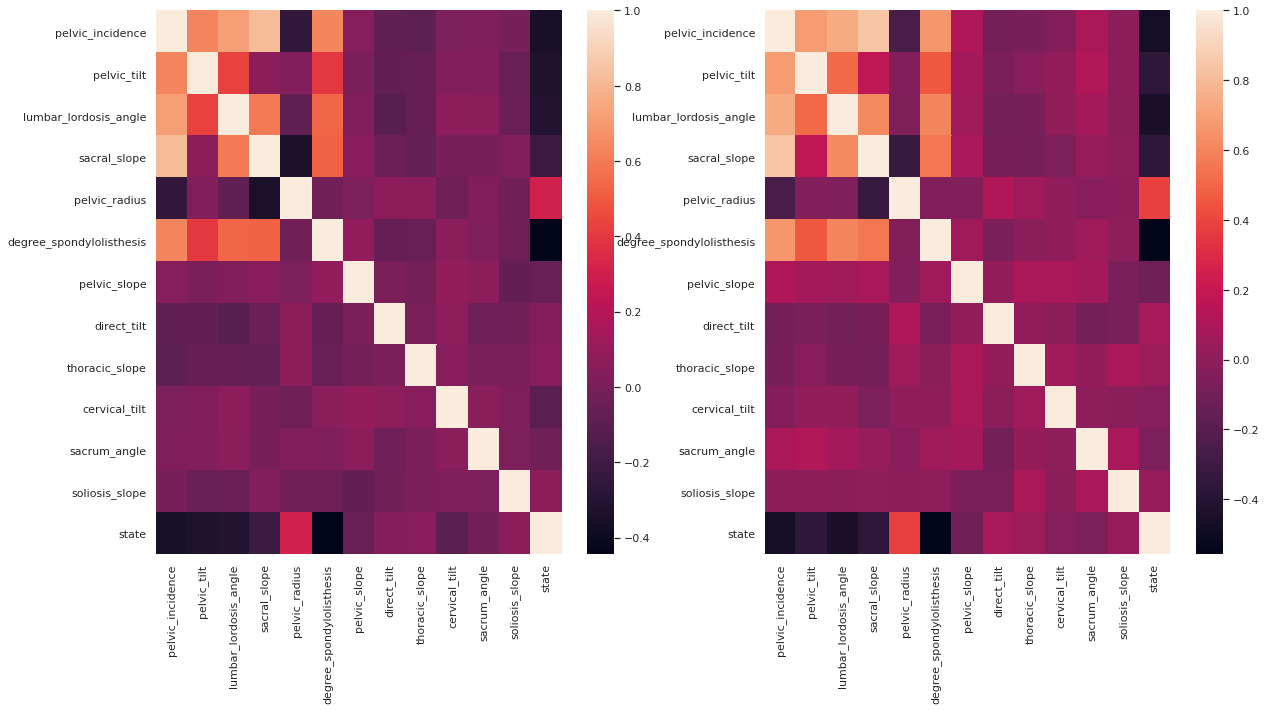

Average difference between correlations: 0.041


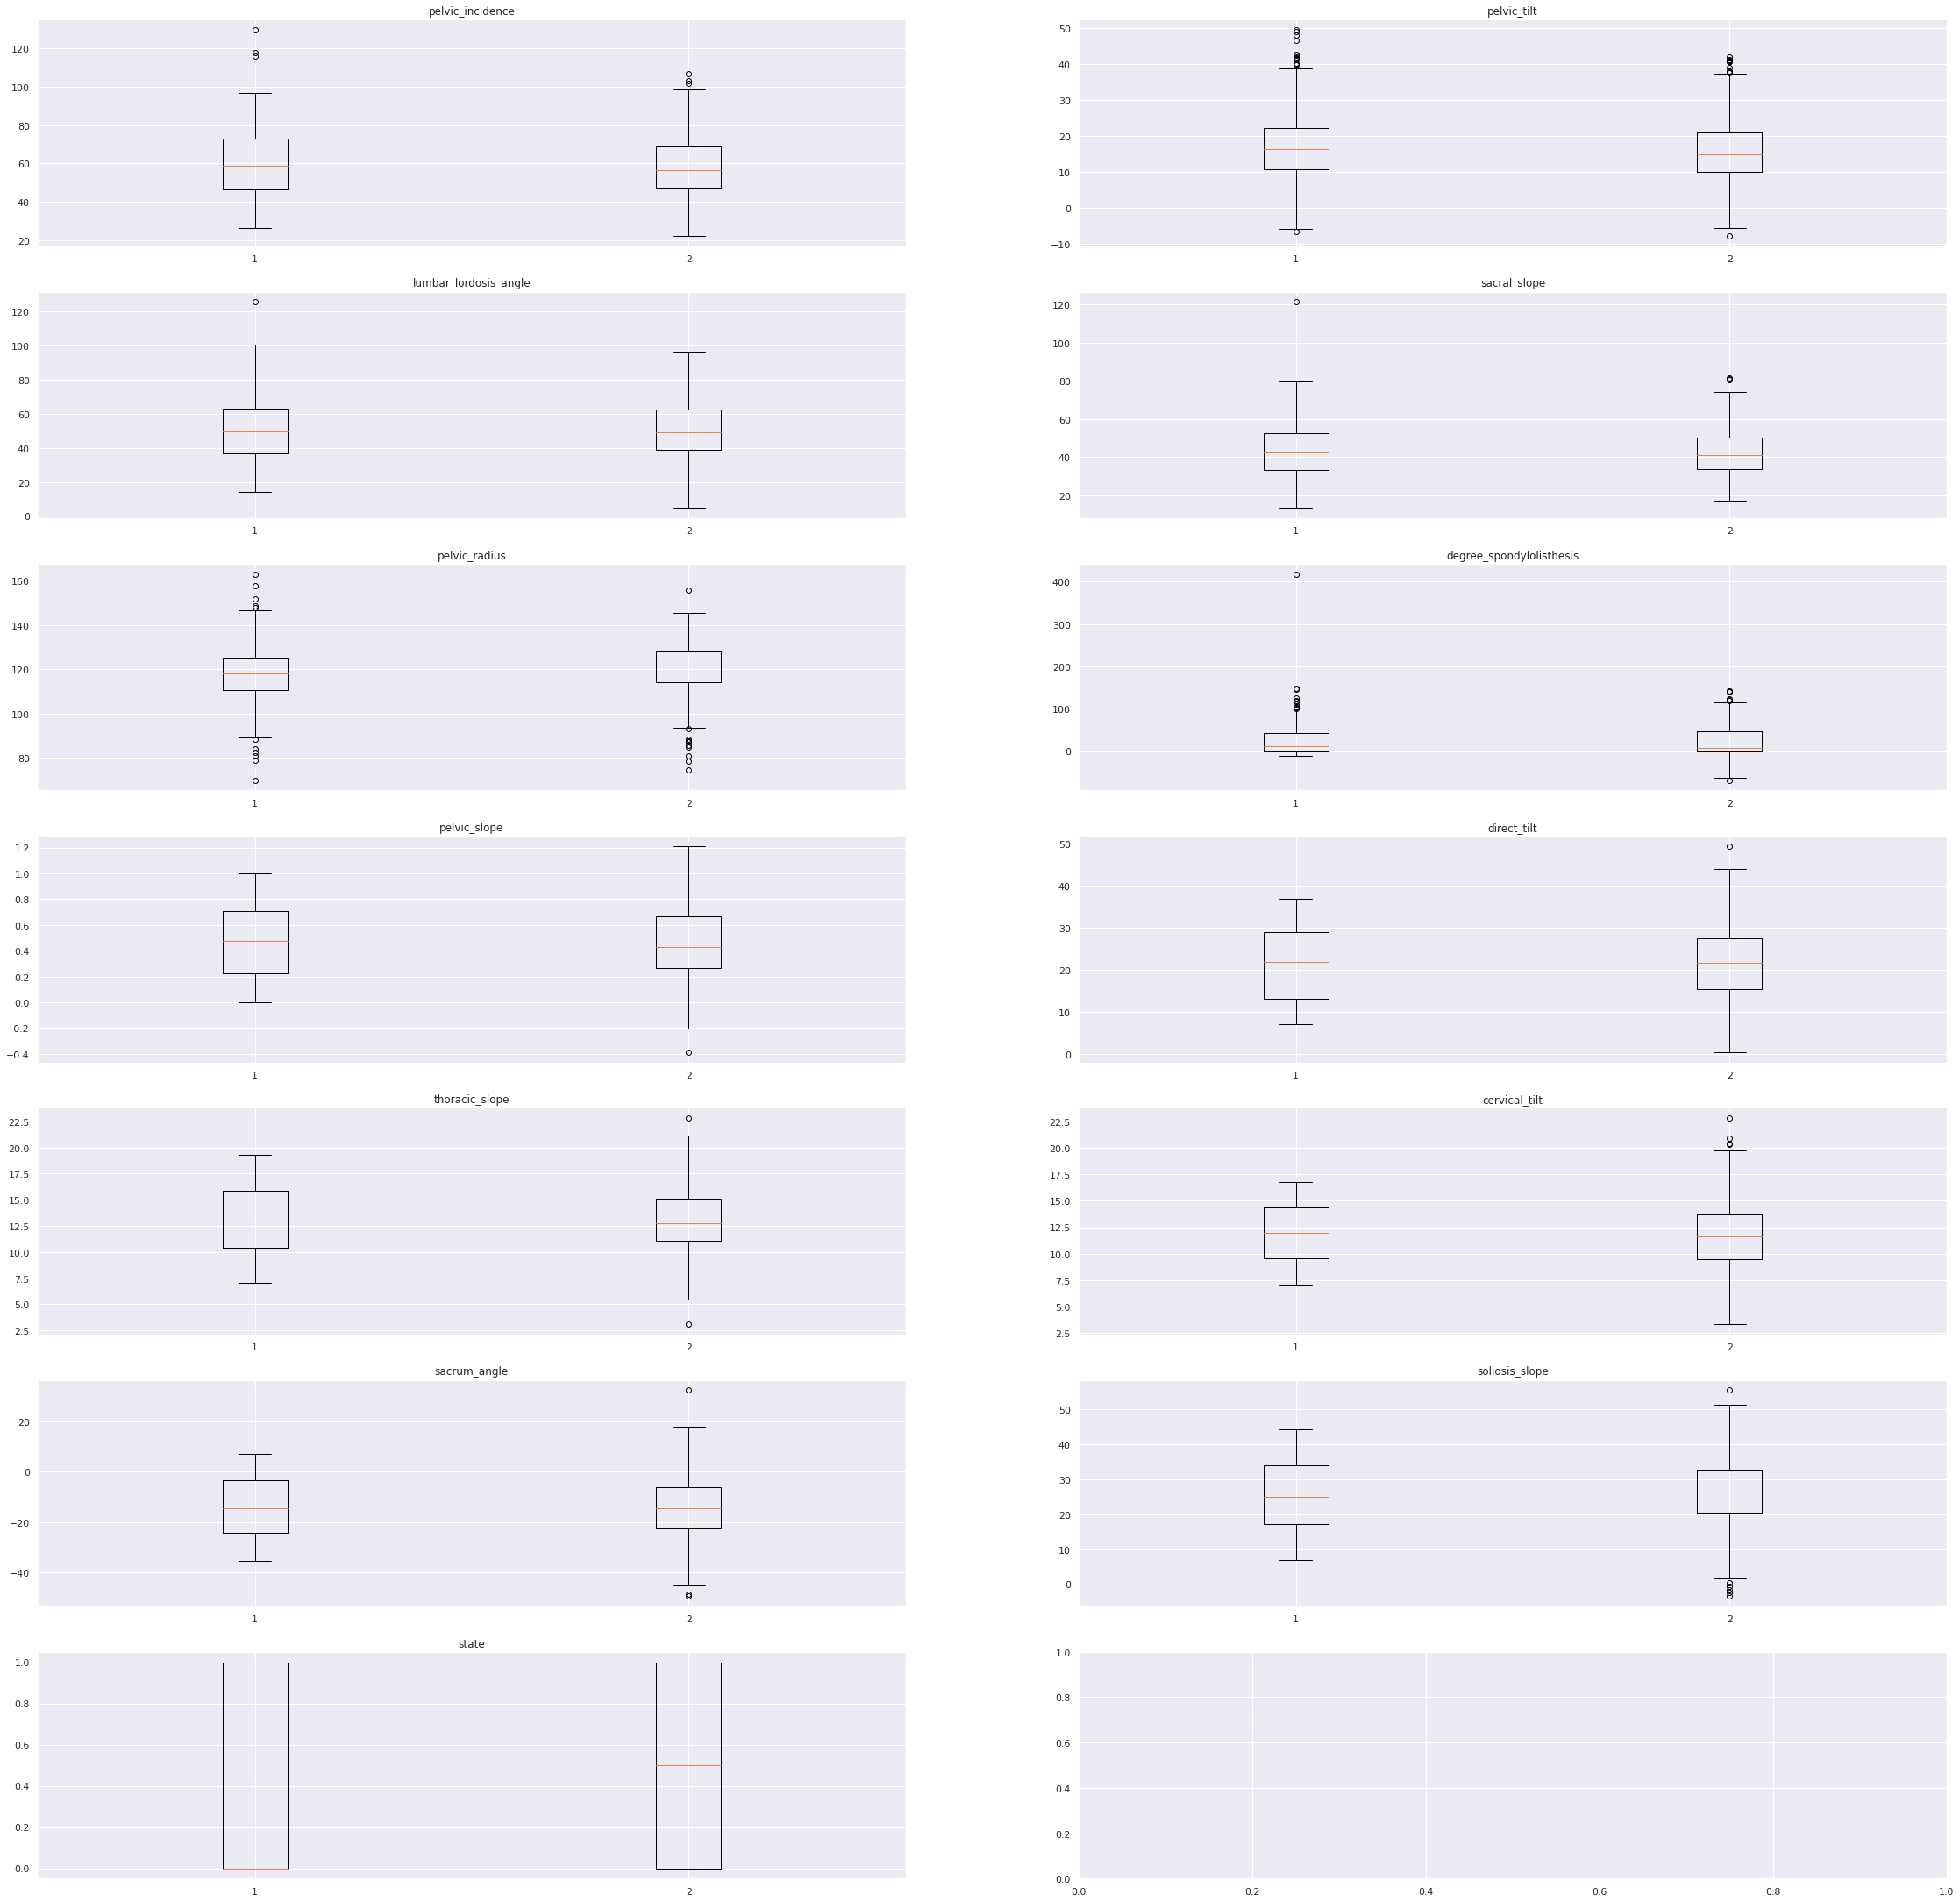

In [22]:
synth_metrics(back_pain, pca_df)

In [34]:
neg_correlation_original = []
neg_correlation_synthetic = []
pos_correlation_original = []
pos_correlation_synthetic = []

correl_coeff_neg = []
correl_coeff_pos= []

# Original data
mask = back_pain['state'] == 0
neg_o = back_pain[mask].copy()
neg_o.drop('state', axis=1, inplace=True)
neg_correlation_original = neg_o.corr().values.flatten()

mask = back_pain['state'] == 1
pos_o = back_pain[mask].copy()
pos_o.drop('state', axis=1, inplace=True)
pos_correlation_original = pos_o.corr().values.flatten()

# Synthetic data
mask = pca_df['state'] == 0
neg_s = pca_df[mask].copy()
neg_s.drop('state', axis=1, inplace=True)
corr_neg_s = neg_s.corr().values.flatten()
neg_correlation_synthetic.append(corr_neg_s)
    
mask = pca_df['state'] == 1
pos_s = pca_df[mask].copy()
pos_s.drop('state', axis=1, inplace=True)
corr_pos_s = pos_s.corr().values.flatten()
pos_correlation_synthetic.append(corr_pos_s)

# Get correlation coefficients
correl_coeff_neg.append(np.corrcoef(
    neg_correlation_original, corr_neg_s)[0,1])

correl_coeff_pos.append(np.corrcoef(
    pos_correlation_original, corr_pos_s)[0,1])

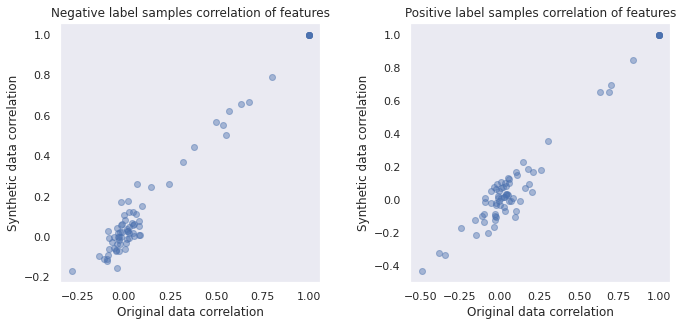

In [38]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.scatter(
    neg_correlation_original,
    neg_correlation_synthetic,
    alpha=0.25)
ax1.grid()
ax1.set_xlabel('Original data correlation')
ax1.set_ylabel('Synthetic data correlation')
ax1.set_title('Negative label samples correlation of features')

ax2 = fig.add_subplot(122)
ax2.scatter(
    pos_correlation_original,
    pos_correlation_synthetic,
    alpha=0.25)
ax2.grid()
ax2.set_xlabel('Original data correlation')
ax2.set_ylabel('Synthetic data correlation')
ax2.set_title('Positive label samples correlation of features')

plt.tight_layout(pad=2)
plt.show()

In [65]:
descriptive_stats_all_runs = []
  
descriptive_stats = pd.DataFrame()

descriptive_stats['Original pos_label mean'] = \
    back_pain[back_pain['state'] == 1].mean()

descriptive_stats['Synthetic pos_label mean'] = \
    pca_df[pca_df['state'] == 1].mean()

descriptive_stats['Original neg_label mean'] = \
    back_pain[back_pain['state'] == 0].mean()

descriptive_stats['Synthetic neg_label mean'] = \
    pca_df[pca_df['state'] == 0].mean()

descriptive_stats['Original pos_label std'] = \
    back_pain[back_pain['state'] == 1].std()

descriptive_stats['Synthetic pos_label std'] = \
    pca_df[pca_df['state'] == 1].std()

descriptive_stats['Original neg_label std'] = \
    back_pain[back_pain['state'] == 0].std()

descriptive_stats['Synthetic neg_label std'] = \
    pca_df[pca_df['state'] == 0].std()
    
descriptive_stats_all_runs.append(descriptive_stats)

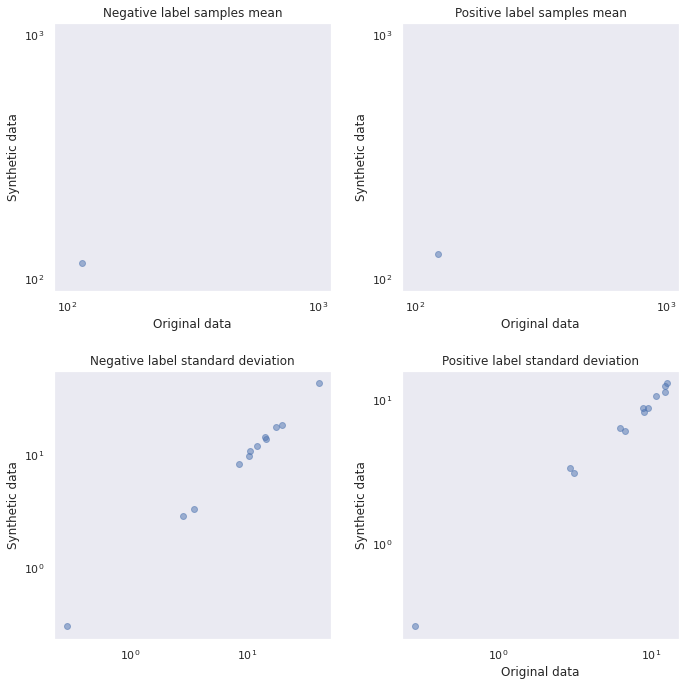

In [66]:
fig = plt.figure(figsize=(10,10))

# Negative label mean
ax1 = fig.add_subplot(221)
x = descriptive_stats_all_runs[0]['Original neg_label mean'].copy()
y = descriptive_stats_all_runs[0]['Synthetic neg_label mean'].copy()
x.drop(labels ='state', inplace=True)
y.drop(labels ='state', inplace=True)
ax1.scatter(x, y, alpha=0.5)
ax1.set_xlabel('Original data')
ax1.set_ylabel('Synthetic data')
ax1.set_title('Negative label samples mean')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()

# Positive label mean
ax2 = fig.add_subplot(222)
x = descriptive_stats_all_runs[0]['Original pos_label mean'].copy()
y = descriptive_stats_all_runs[0]['Synthetic pos_label mean'].copy()
x.drop(labels ='state', inplace=True)
y.drop(labels ='state', inplace=True)
ax2.scatter(x, y, alpha=0.5)
ax2.set_xlabel('Original data')
ax2.set_ylabel('Synthetic data')
ax2.set_title('Positive label samples mean')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()

# Negative label standard deviation
ax3 = fig.add_subplot(223)
x = descriptive_stats_all_runs[0]['Original neg_label std'].copy()
y = descriptive_stats_all_runs[0]['Synthetic neg_label std'].copy()
x.drop(labels ='state', inplace=True)
y.drop(labels ='state', inplace=True)
ax3.scatter(x, y, alpha=0.5)
ax3.set_ylabel('Synthetic data')
ax3.set_title('Negative label standard deviation')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid()

# Positive label standard deviation
ax4 = fig.add_subplot(224)
x = descriptive_stats_all_runs[0]['Original pos_label std'].copy()
y = descriptive_stats_all_runs[0]['Synthetic pos_label std'].copy()
x.drop(labels ='state', inplace=True)
y.drop(labels ='state', inplace=True)
ax4.scatter(x, y, alpha=0.5)
ax4.set_xlabel('Original data')
ax4.set_ylabel('Synthetic data')
ax4.set_title('Positive label standard deviation')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.grid()

plt.tight_layout(pad=2)
plt.show()